In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       
import matplotlib.pyplot as plt 
import plotly.express as px
%matplotlib inline     
sns.set(color_codes=True)
import warnings

In [2]:
sales = pd.read_csv('../DATA/supermarket_sales.csv')

In [5]:
#Exploratory Data Analysis

In [6]:
sales.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [7]:
sales.tail(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


In [8]:
sales.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [9]:
sales.rename(columns={"Customer type": "Customer_type", "Product line": "Product_line",
                   "Unit price": "Unit_price", "Tax 5%": "Tax_5", "gross margin percentage": "gross_margin_percentage", 
                   "gross income": "gross_income"}, inplace="True")

In [10]:
print('The shape of the Data: {}\n'.format(sales.shape))

The shape of the Data: (1000, 17)



In [11]:
duplicate_rows_sales = sales[sales.duplicated()]
print("number of duplicate rows: ", duplicate_rows_sales.shape)

number of duplicate rows:  (0, 17)


In [12]:
print(sales.isnull().sum())

Invoice ID                 0
Branch                     0
City                       0
Customer_type              0
Gender                     0
Product_line               0
Unit_price                 0
Quantity                   0
Tax_5                      0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross_margin_percentage    0
gross_income               0
Rating                     0
dtype: int64


In [13]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer_type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product_line             1000 non-null   object 
 6   Unit_price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax_5                    1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross_margin_percentage  

In [14]:
sales.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit_price,1000.0,55.672130,2.649463e+01,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431e+00,1.000000,3.000000,5.000000,8.000000,10.000000
Tax_5,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,2.458853e+02,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,2.341765e+02,10.170000,118.497500,241.760000,448.905000,993.000000
gross_margin_percentage,1000.0,4.761905,6.131498e-14,4.761905,4.761905,4.761905,4.761905,4.761905
gross_income,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580e+00,4.000000,5.500000,7.000000,8.500000,10.000000


In [15]:
#Observations: 
#-average unit price is $55.67, min price is $10.08 and max price is $99.96
#-average total price is $322.96, min total price is $10.67 and maximum total price is $1042.65
#-average rating is 6.97, min rating is 4 and maximum is 10

array([[<AxesSubplot:title={'center':'Unit_price'}>,
        <AxesSubplot:title={'center':'Quantity'}>,
        <AxesSubplot:title={'center':'Tax_5'}>],
       [<AxesSubplot:title={'center':'Total'}>,
        <AxesSubplot:title={'center':'cogs'}>,
        <AxesSubplot:title={'center':'gross_margin_percentage'}>],
       [<AxesSubplot:title={'center':'gross_income'}>,
        <AxesSubplot:title={'center':'Rating'}>, <AxesSubplot:>]],
      dtype=object)

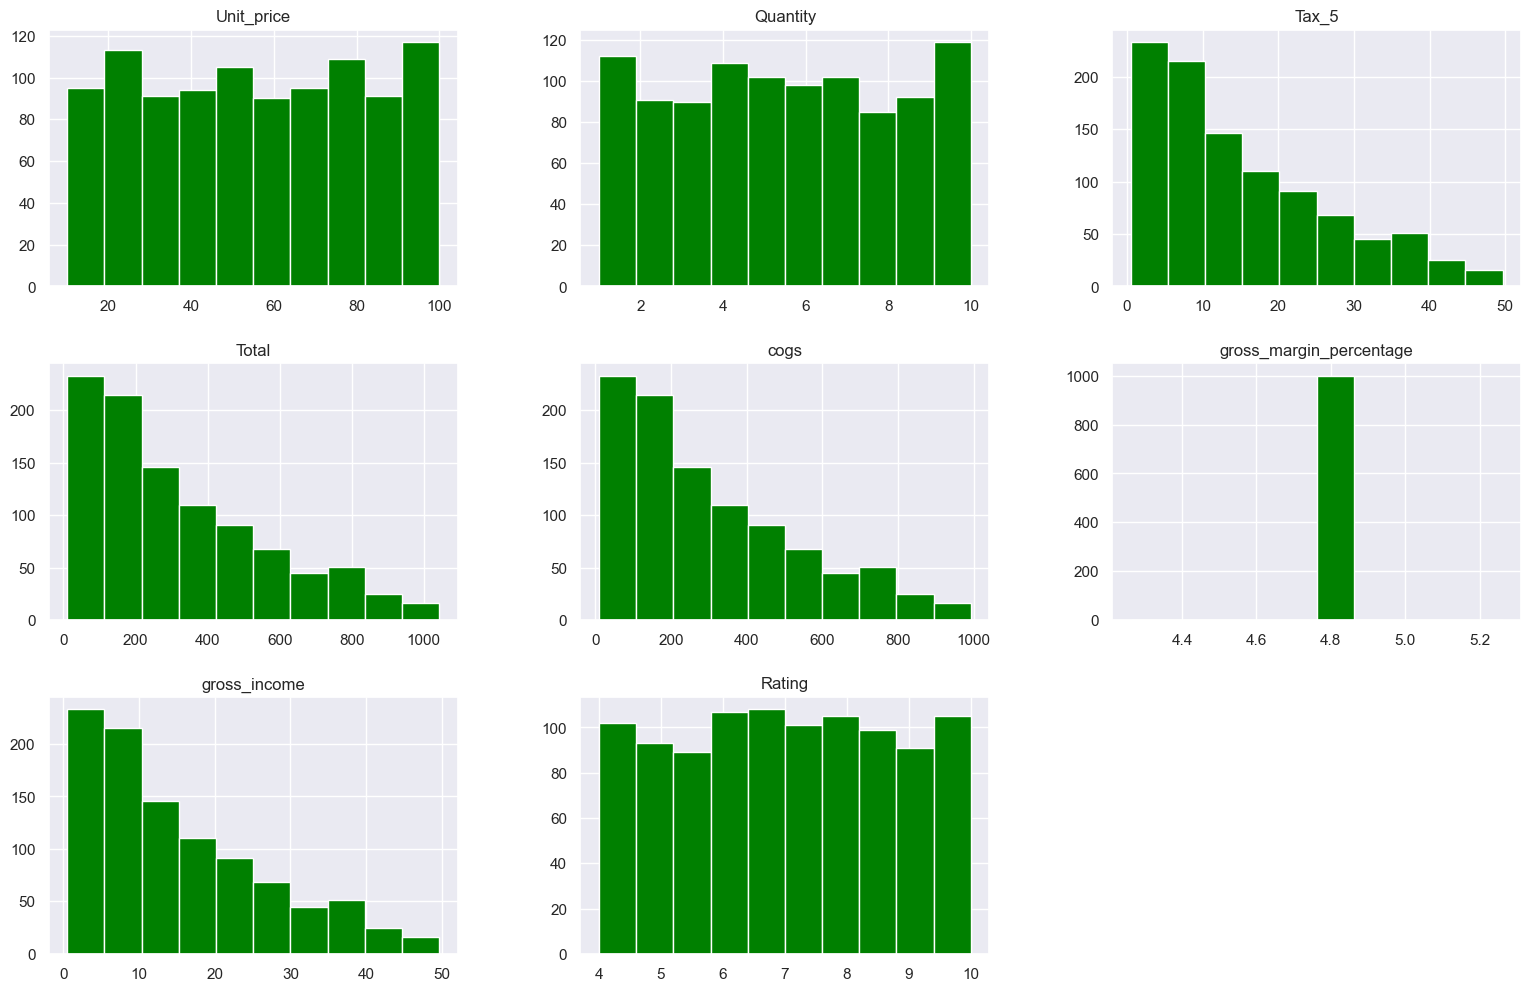

In [16]:
sales.hist
sales.hist(figsize=(19,12), color="Green")

<AxesSubplot:>

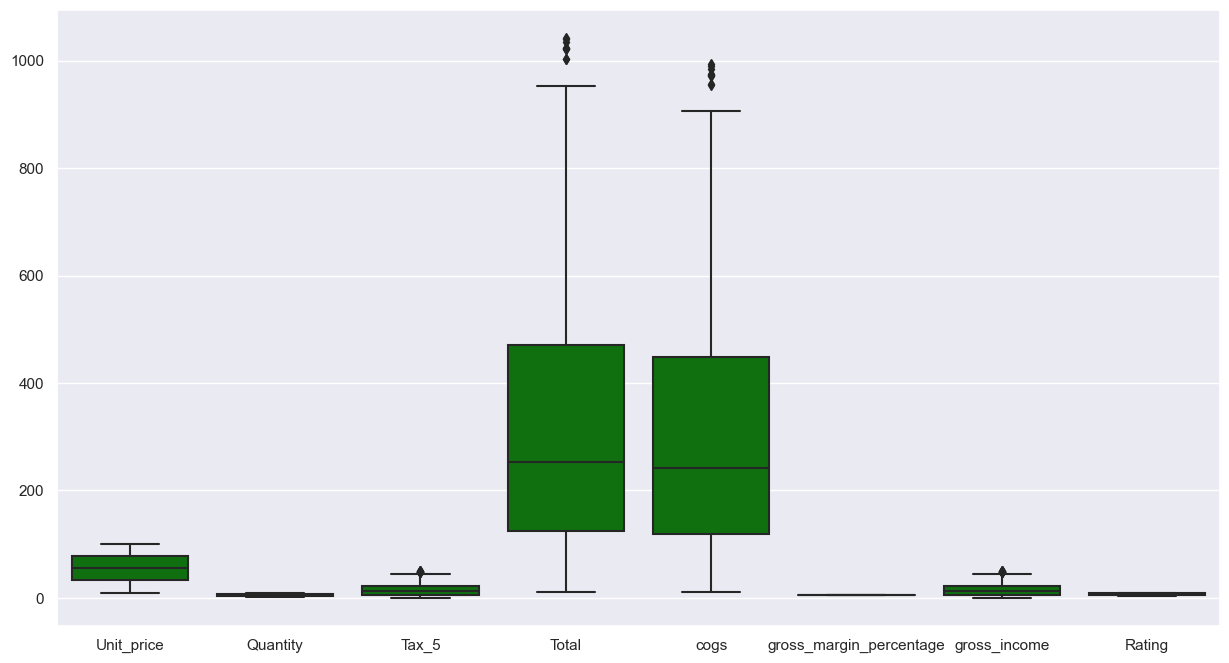

In [18]:
plt.figure(figsize=(15,8))
sns.boxplot(data=sales, color="Green")

<AxesSubplot:>

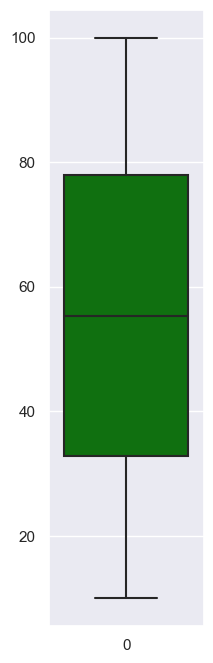

In [19]:
plt.figure(figsize=(2,8))
sns.boxplot(data=sales['Unit_price'], color="Green")

<AxesSubplot:>

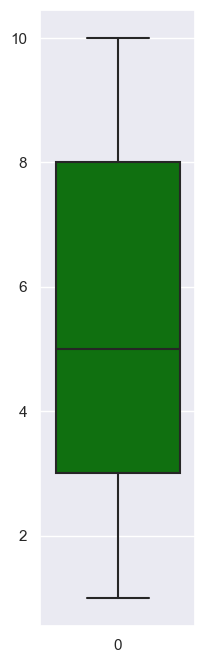

In [20]:
plt.figure(figsize=(2,8))
sns.boxplot(data=sales['Quantity'], color="Green")

<AxesSubplot:>

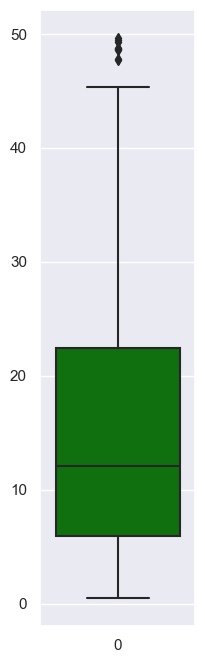

In [21]:
plt.figure(figsize=(2,8))
sns.boxplot(data=sales['Tax_5'], color="Green")

<AxesSubplot:>

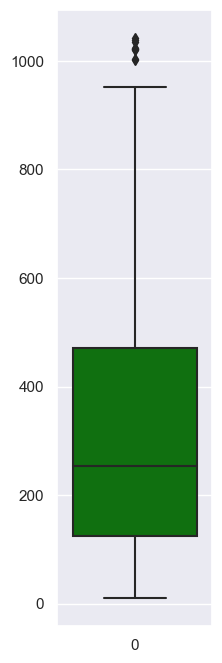

In [22]:
plt.figure(figsize=(2,8))
sns.boxplot(data=sales['Total'], color="Green")

<AxesSubplot:>

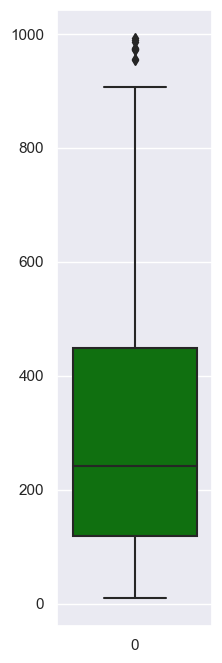

In [23]:
plt.figure(figsize=(2,8))
sns.boxplot(data=sales['cogs'], color="Green")

<AxesSubplot:>

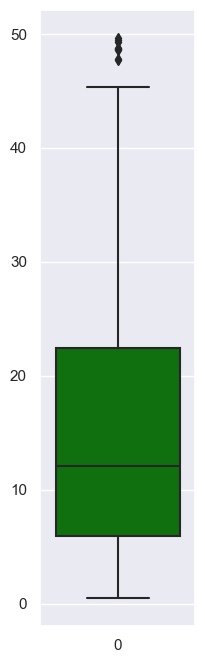

In [24]:
plt.figure(figsize=(2,8))
sns.boxplot(data=sales['gross_income'], color="Green")

<AxesSubplot:>

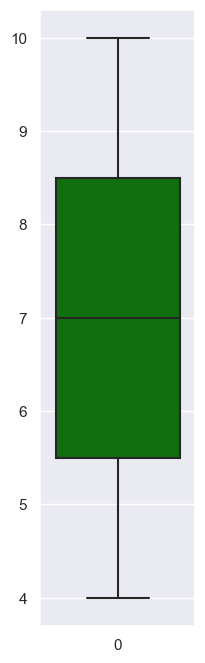

In [25]:
plt.figure(figsize=(2,8))
sns.boxplot(data=sales['Rating'], color="Green")

Text(0.5, 1.0, 'Correlation Heatmap of Sales Data')

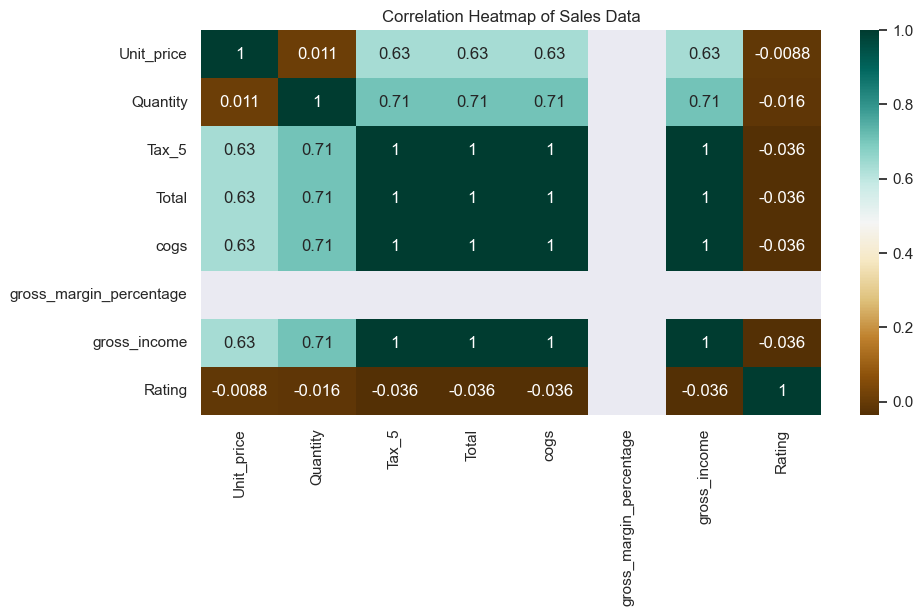

In [26]:
plt.figure(figsize=(10,5))
c=sales.corr()
sns.heatmap(c, cmap="BrBG",annot=True)
c
plt.title("Correlation Heatmap of Sales Data")

C:\Users\OEM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


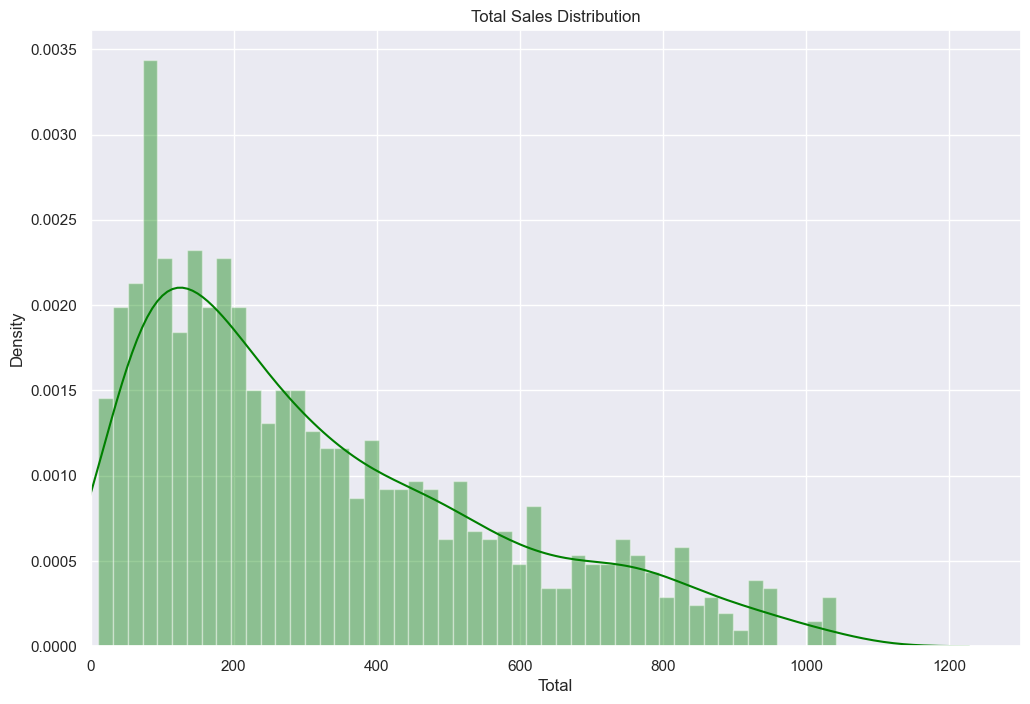

In [27]:
plt.figure(figsize=(12, 8))
sns.distplot(sales["Total"], color="Green", bins=50)
plt.title("Total Sales Distribution")
plt.xlim(0, 1300)
plt.show()

C:\Users\OEM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


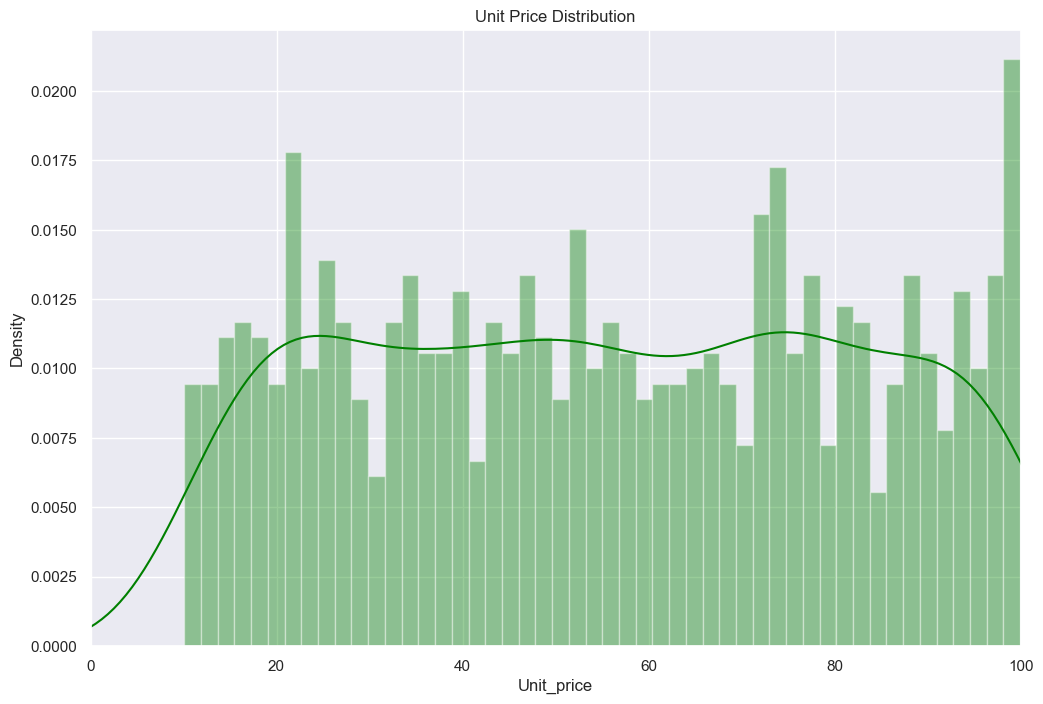

In [28]:
plt.figure(figsize=(12, 8))
sns.distplot(sales["Unit_price"], color="Green", bins=50)
plt.title("Unit Price Distribution")
plt.xlim(0, 100)
plt.show()

C:\Users\OEM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


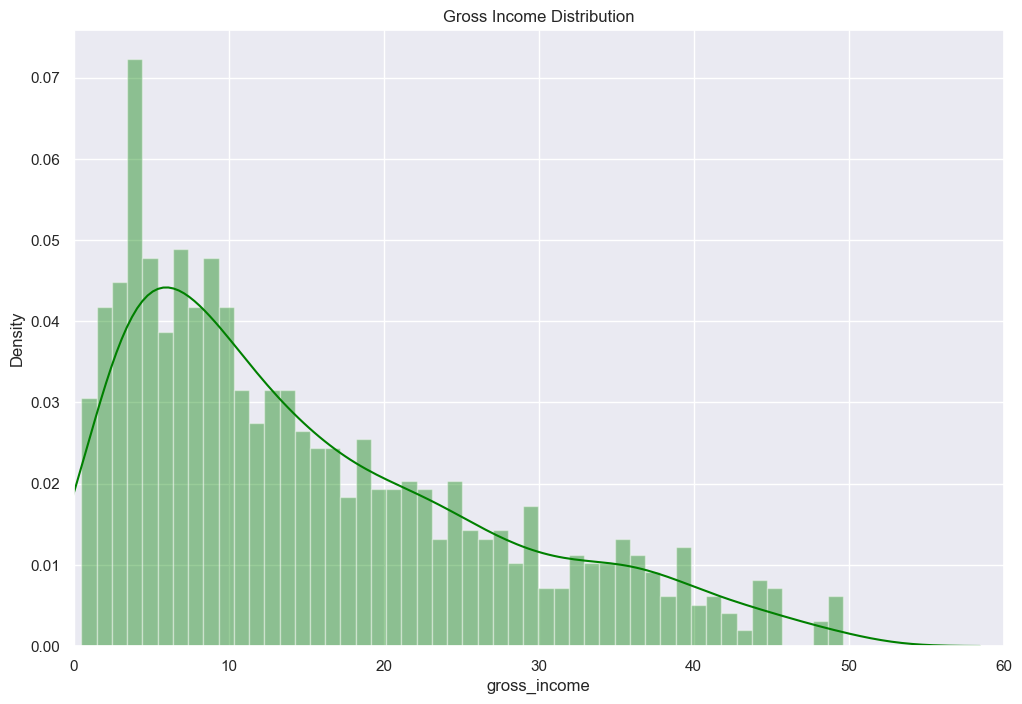

In [29]:
plt.figure(figsize=(12, 8))
sns.distplot(sales["gross_income"], color="Green", bins=50)
plt.title("Gross Income Distribution")
plt.xlim(0, 60)
plt.show()

C:\Users\OEM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


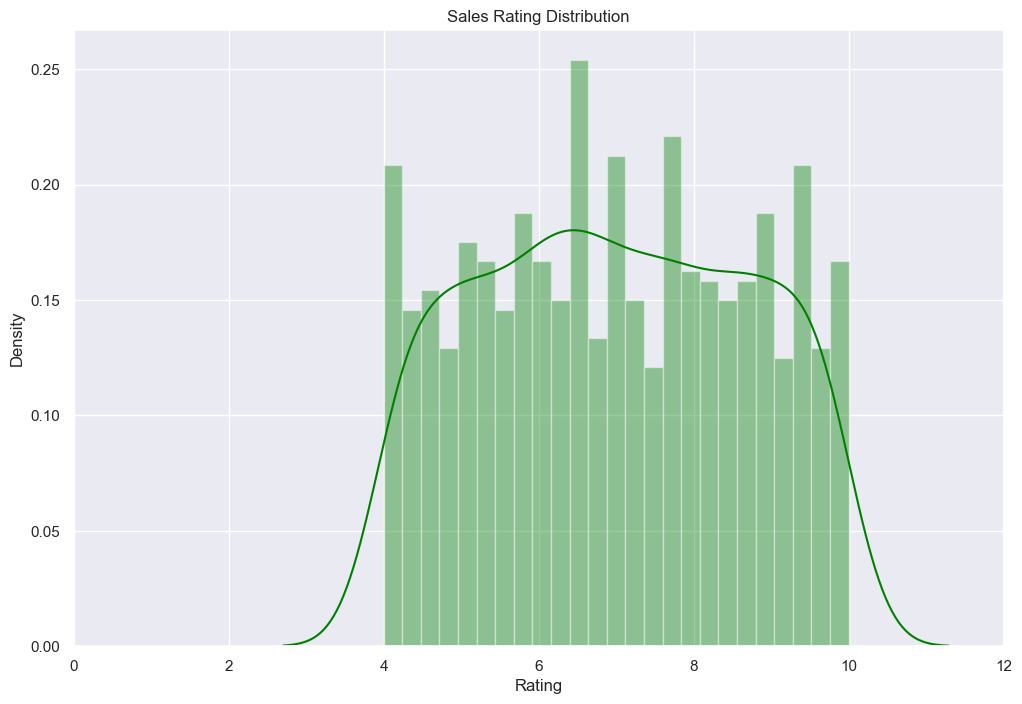

In [30]:
plt.figure(figsize=(12, 8))
sns.distplot(sales["Rating"], color="Green", bins=25)
plt.title("Sales Rating Distribution")
plt.xlim(0, 12)
plt.show()

In [31]:
sales.Gender.value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

In [32]:
sales.Product_line.value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product_line, dtype: int64

In [33]:
sales.Rating.value_counts()

6.0     26
6.6     24
4.2     22
9.5     22
6.5     21
        ..
4.0     11
5.3     11
8.3     11
4.6      8
10.0     5
Name: Rating, Length: 61, dtype: int64

Text(0.5, 1.0, 'Count of Customer Ratings by Members and Non-Members')

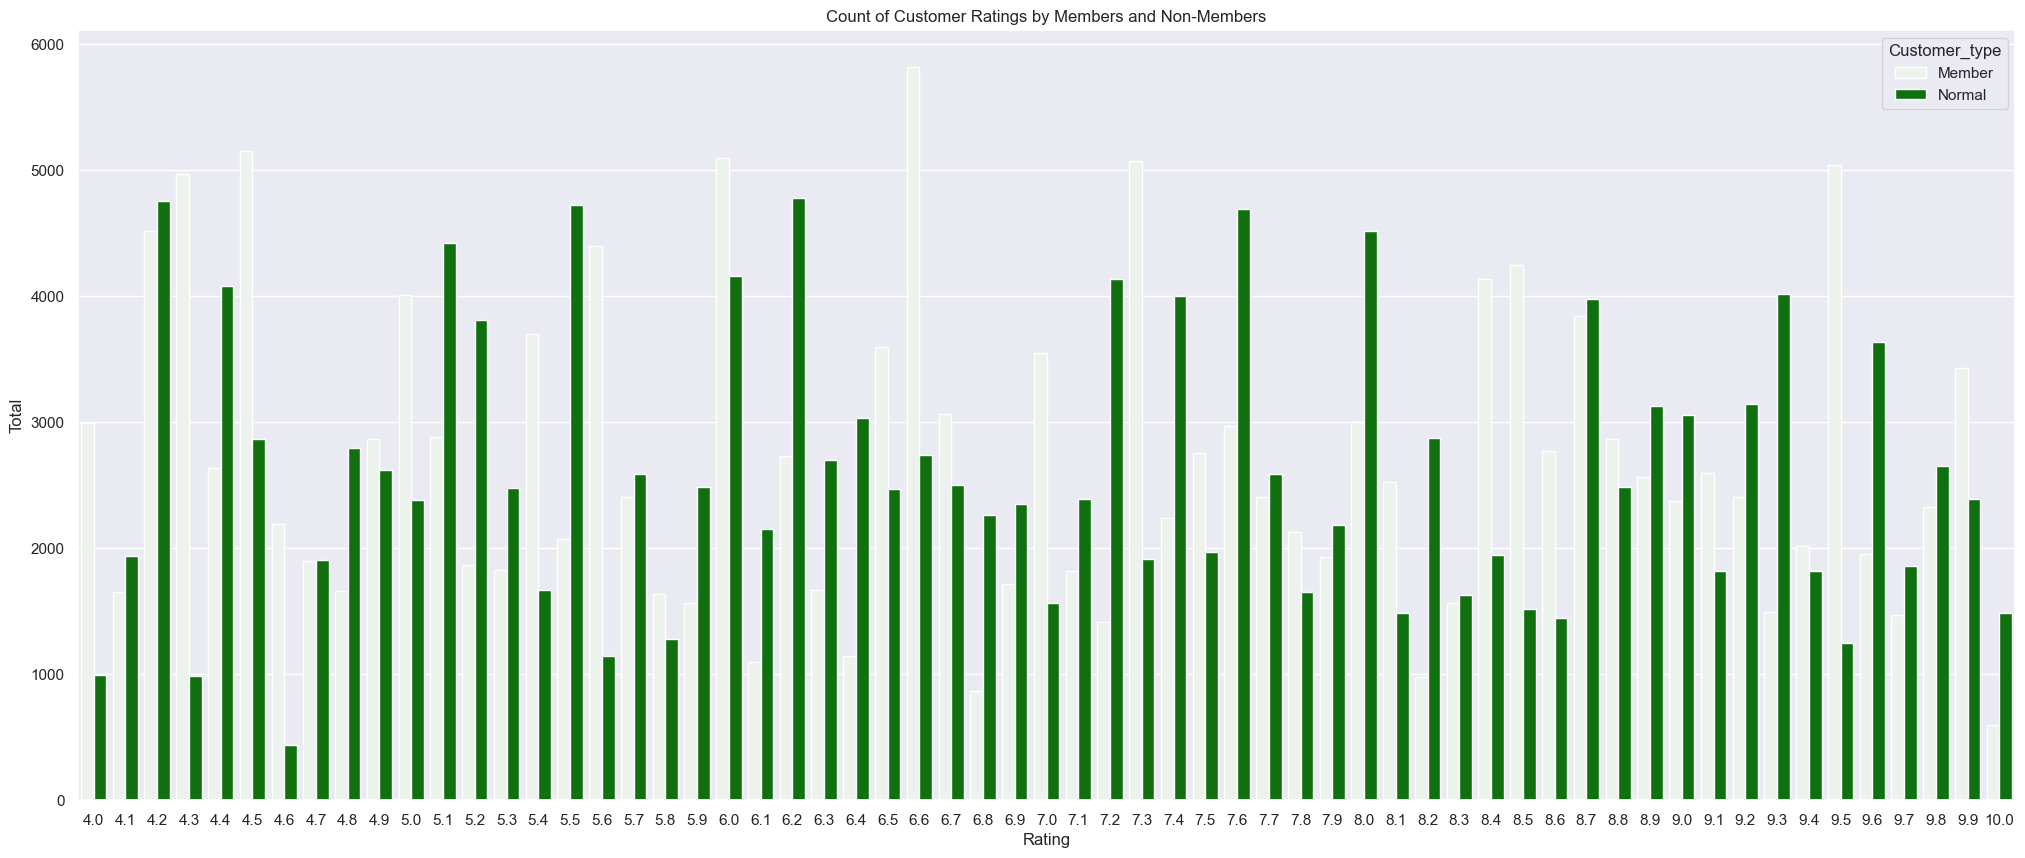

In [34]:
plt.figure(figsize=(25,10))
sns.barplot(x='Rating', y = 'Total', hue = 'Customer_type', data = sales, estimator = sum, ci = None, color= "Green")
plt.title ("Count of Customer Ratings by Members and Non-Members")

In [35]:
customer_data = sales.groupby(['Customer_type'])['Rating'].mean()
customer_data = customer_data.sort_values(ascending=False)
print(customer_data.head())

Customer_type
Normal    7.005210
Member    6.940319
Name: Rating, dtype: float64


<AxesSubplot:title={'center':'Average Customer Type Rating'}, xlabel='Customer_type'>

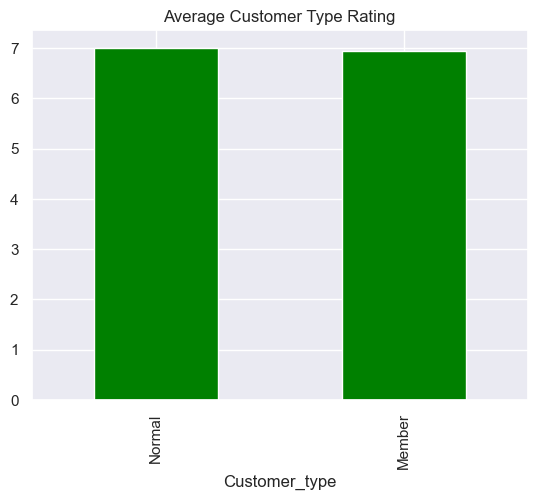

In [36]:
customer_data.head(10).plot(kind='bar', title = 'Average Customer Type Rating', color="Green")

In [37]:
# lets subset our customers into Low, Medium and High scorers
bins = np.linspace(min(sales["Rating"]), max(sales["Rating"]), 4)

group_names = ['Low', 'Medium', 'High']

sales['Rating-binned'] = pd.cut(sales['Rating'], bins, labels=group_names, include_lowest=True )
sales[['Rating','Rating-binned']].head(10)

,Rating,Rating-binned
0,9.1,High
1,9.6,High
2,7.4,Medium
3,8.4,High
4,5.3,Low
5,4.1,Low
6,5.8,Low
7,8.0,Medium
8,7.2,Medium
9,5.9,Low


In [38]:
sales["Rating-binned"].value_counts()

Medium    351
Low       341
High      308
Name: Rating-binned, dtype: int64

Text(0.5, 1.0, 'Distribution of Customer Rating bins')

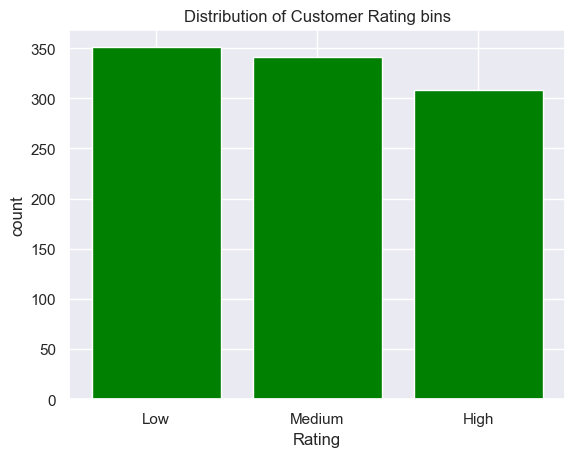

In [39]:
plt.bar(group_names, sales["Rating-binned"].value_counts(), color="Green")

plt.xlabel("Rating")
plt.ylabel("count")
plt.title("Distribution of Customer Rating bins")

Text(0.5, 1.0, 'Distribution of Customer Rating bins')

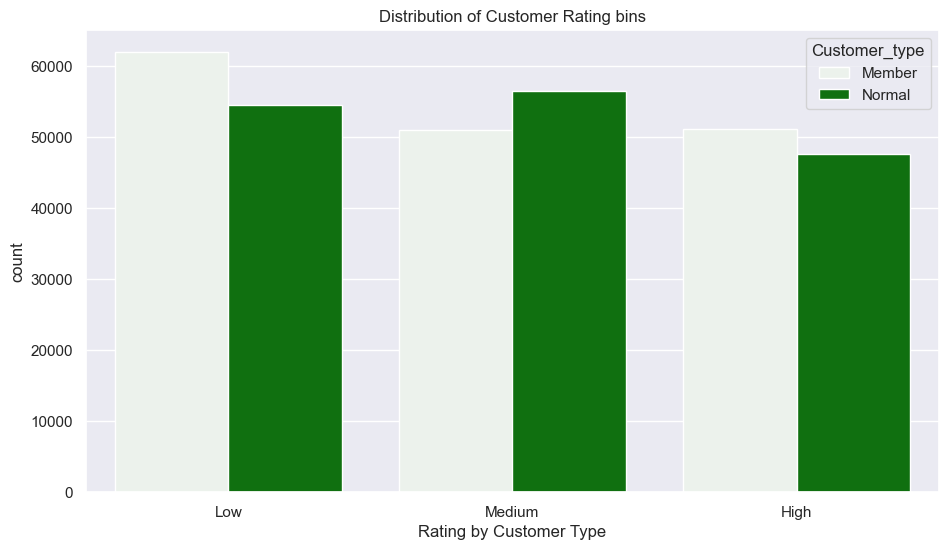

In [40]:
plt.figure(figsize = (11,6))
sns.barplot(x = 'Rating-binned', y = 'Total', hue = 'Customer_type', data = sales, ci = None, estimator = sum, color="Green")
plt.xlabel("Rating by Customer Type")
plt.ylabel("count")
plt.title("Distribution of Customer Rating bins")

Text(0.5, 1.0, 'Distribution of Customer Rating bins')

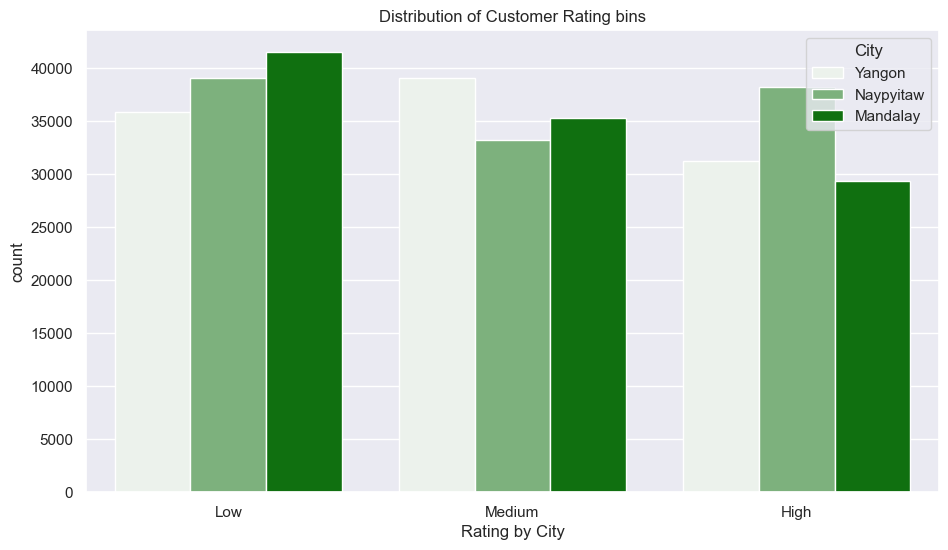

In [41]:
plt.figure(figsize = (11,6))
sns.barplot(x = 'Rating-binned', y = 'Total', hue = 'City', data = sales, ci = None, estimator = sum, color="Green")
plt.xlabel("Rating by City")
plt.ylabel("count")
plt.title("Distribution of Customer Rating bins")

In [ ]:
#We need to translate the categorical date we're going to use into continuous (to work in our model)

In [42]:
sales.loc[sales['Gender'] == 'Female', 'Gender'] = 1
sales.loc[sales['Gender'] == 'Male', 'Gender'] = 2

In [43]:
sales.loc[sales['Product_line'] == 'Health and beauty', 'Product_line']=1
sales.loc[sales['Product_line'] == 'Electronic accessories', 'Product_line'] = 2
sales.loc[sales['Product_line'] ==  'Home and lifestyle', 'Product_line'] = 3
sales.loc[sales['Product_line'] == 'Sports and travel', 'Product_line'] = 4
sales.loc[sales['Product_line'] == 'Food and beverages','Product_line'] = 5
sales.loc[sales['Product_line'] == 'Fashion accessories', 'Product_line'] = 6

In [44]:
sales.loc[sales['Customer_type'] =='Member', 'Customer_type']= 1
sales.loc[sales['Customer_type'] == 'Normal', 'Customer_type'] = 2

In [45]:
sales.loc[sales['City']== 'Yangon', 'City'] = 1
sales.loc[sales['City']== 'Naypyitaw', 'City'] = 2
sales.loc[sales['City']== 'Mandalay', 'City'] = 3

In [46]:
sales.loc[sales['Payment'] == 'Cash', 'Payment'] = 1
sales.loc[sales['Payment'] == 'Credit card', 'Payment'] = 2
sales.loc[sales['Payment'] == 'Ewallet', 'Payment'] = 3

In [47]:
sales.loc[sales['Branch'] == 'A', 'Branch'] = 1
sales.loc[sales['Branch'] == 'B', 'Branch'] = 2
sales.loc[sales['Branch'] == 'C', 'Branch'] = 3
sales.head()

,Invoice ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax_5,Total,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating,Rating-binned
0,750-67-8428,1,1,1,1,1,74.69,7,26.1415,548.9715,1/5/2019,13:08,3,522.83,4.761905,26.1415,9.1,High
1,226-31-3081,3,2,2,1,2,15.28,5,3.8200,80.2200,3/8/2019,10:29,1,76.40,4.761905,3.8200,9.6,High
2,631-41-3108,1,1,2,2,3,46.33,7,16.2155,340.5255,3/3/2019,13:23,2,324.31,4.761905,16.2155,7.4,Medium
3,123-19-1176,1,1,1,2,1,58.22,8,23.2880,489.0480,1/27/2019,20:33,3,465.76,4.761905,23.2880,8.4,High
4,373-73-7910,1,1,2,2,4,86.31,7,30.2085,634.3785,2/8/2019,10:37,3,604.17,4.761905,30.2085,5.3,Low


In [48]:
sales.drop(['Invoice ID', 'Tax_5', 'Time', 'Payment', 'Date', 'Rating-binned'], axis = 1, inplace=True)

In [50]:
#Logistic Regression Processing

In [51]:
sales.columns

Index(['Branch', 'City', 'Customer_type', 'Gender', 'Product_line',
       'Unit_price', 'Quantity', 'Total', 'cogs', 'gross_margin_percentage',
       'gross_income', 'Rating'],
      dtype='object')

In [52]:
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

#Defining features
X = sales[['Branch', 'City', 'Customer_type', 'Gender', 'Product_line', 'Unit_price', 'Quantity', 'Total']]
y = sales['Rating']

#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

print(f'Total number of feature dataset: {len(X)}')
print(f'Total number of training data: {len(X_train)}')
print(f'Shape of train data: {X_train.shape}')
print(f'Shape of test data: {X_test.shape}')

Total number of feature dataset: 1000
Total number of training data: 750
Shape of train data: (750, 8)
Shape of test data: (250, 8)


In [53]:
model = LinearRegression()

In [54]:
model.fit(X_train, y_train)

LinearRegression()

In [55]:
predictions = model.predict(X_test)
predictions

array([6.71865247, 6.70540604, 7.05324828, 7.58533703, 7.44781914,
       6.65793884, 6.81481446, 6.97386619, 7.1397268 , 6.86531634,
       7.46238847, 6.83606504, 6.80243952, 6.85931724, 6.80618707,
       6.58540022, 6.7900412 , 6.87466465, 7.33556919, 7.15217381,
       7.18734399, 7.18670888, 7.25546724, 7.23677033, 6.64555847,
       6.76704778, 7.36547733, 6.71394096, 6.96576608, 6.9749111 ,
       6.72122956, 7.097951  , 7.28292235, 7.12154684, 6.9803273 ,
       6.52127119, 6.87653243, 6.78072373, 7.11909877, 6.87508467,
       7.01870991, 7.17540013, 7.09882532, 7.00729373, 7.34659014,
       7.19709625, 7.34232864, 7.14209638, 6.73697861, 6.98737409,
       7.4009913 , 7.23052384, 6.87235598, 7.26141832, 6.58638224,
       6.8505692 , 7.07272206, 7.06345467, 6.97243521, 6.7041024 ,
       6.69817248, 6.7164998 , 6.88985065, 6.82254651, 6.85494142,
       7.12780721, 7.05464556, 7.27226135, 6.75995267, 6.97852927,
       6.96098414, 6.80801504, 6.97284932, 6.73721269, 6.40569

In [56]:
model.score(X_test, y_test)

-0.03548441221179632

In [57]:
from sklearn.metrics import mean_squared_error
print("Mean Squared Error model:",mean_squared_error(y_test, predictions))

Mean Squared Error model: 2.913330257755204


In [58]:
print("Root Mean Squared Error model:",np.sqrt(mean_squared_error(y_test, predictions)))

Root Mean Squared Error model: 1.7068480476466568


In [59]:
import sklearn.metrics as m
print("Mean Absolute Percentage Error model:",np.mean(np.abs( (y_test-predictions) / y_test))*100)

Mean Absolute Percentage Error model: 22.777259133914256


In [60]:
def adj_r2(X, y, model):
    r2 = model.score(X, y)
    n = X.shape[0]
    p = X.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    
    return adjusted_r2

In [61]:
print(adj_r2(X_train, y_train, model))

0.008755352710010933


In [92]:
print(adj_r2(X_test, y_test, model))

-0.06985733875824596


In [62]:
#Lasso Regression

In [66]:
from sklearn.linear_model import Lasso, LassoCV

lasso_cv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lasso_cv.fit(X_train, y_train)
warnings.filterwarnings('ignore')

In [67]:
print(adj_r2(X_test, y_test, model))

-0.06985733875824596


In [69]:
alpha = lasso_cv.alpha_
alpha

0.003929258096037373

In [70]:
lasso = Lasso(alpha = lasso_cv.alpha_)
lasso.fit(X_train, y_train)

Lasso(alpha=0.003929258096037373)

In [71]:
lasso.score(X_train, y_train)

0.019263884099015027

In [72]:
lasso.score(X_test, y_test)

-0.03406857238665384

In [73]:
print(adj_r2(X_train, y_train, lasso))

0.008675639932742563


In [74]:
print(adj_r2(X_test, y_test, lasso))

-0.06839450010073356


In [83]:
predictions_lasso = lasso.predict(X_test)
predictions_lasso

array([6.72854697, 6.72160566, 7.05123508, 7.55906649, 7.42852802,
       6.66131638, 6.84070969, 6.96787968, 7.14368697, 6.86603041,
       7.43834359, 6.84242189, 6.81305881, 6.85631268, 6.81758749,
       6.60170386, 6.78832378, 6.89361785, 7.3081334 , 7.14305012,
       7.20007018, 7.17775838, 7.23854086, 7.21010174, 6.64020094,
       6.76798064, 7.34335479, 6.73046049, 6.95638408, 6.97628855,
       6.75133316, 7.08201117, 7.2800355 , 7.11044738, 6.98087006,
       6.53853029, 6.87805648, 6.78575952, 7.11053178, 6.87297057,
       7.03866137, 7.15950145, 7.10410809, 6.97592251, 7.31958723,
       7.16888437, 7.32386673, 7.13345215, 6.73601898, 6.96989649,
       7.38241089, 7.22932912, 6.86737047, 7.26439751, 6.60039773,
       6.87503832, 7.0553243 , 7.07733379, 6.97359031, 6.73664603,
       6.71746352, 6.74806716, 6.89452448, 6.83691127, 6.85418338,
       7.12999355, 7.05394532, 7.25276795, 6.78167627, 6.96319372,
       6.9505135 , 6.83523615, 6.96460229, 6.73768415, 6.40687

In [86]:
print("Mean Squared Error lasso model:",mean_squared_error(y_test, predictions_lasso))

Mean Squared Error lasso model: 2.9093467994297315


In [87]:
print("Root Mean Squared Error lasso model:",np.sqrt(mean_squared_error(y_test, predictions_lasso)))

Root Mean Squared Error lasso model: 1.7056807437002188


In [88]:
print("Mean Absolute Percentage Error lasso model:",np.mean(np.abs( (y_test-predictions_lasso) / y_test))*100)

Mean Absolute Percentage Error lasso model: 22.775183338601448


In [75]:
#Ridge Regression

In [76]:
from sklearn.linear_model import Ridge, RidgeCV

alphas = np.random.uniform(0, 10, 50)
ridge_cv = RidgeCV(alphas = alphas, cv = 10, normalize = True)
ridge_cv.fit(X_train, y_train)
warnings.filterwarnings('ignore')

In [77]:
alpha = ridge_cv.alpha_
alpha

9.875740438343065

In [85]:
predictions_ridge = ridge.predict(X_test)
predictions_ridge

array([6.72624052, 6.71329997, 7.05255396, 7.57335624, 7.4392466 ,
       6.66650074, 6.82418171, 6.9779527 , 7.13270098, 6.86006564,
       7.45193576, 6.83023644, 6.80388881, 6.85910358, 6.81338037,
       6.59394166, 6.79564342, 6.87588011, 7.32607573, 7.14488808,
       7.19238877, 7.18451544, 7.24754712, 7.22807263, 6.65263501,
       6.77434088, 7.35547465, 6.72404033, 6.96453808, 6.97442049,
       6.73148079, 7.09690052, 7.27506191, 7.12626158, 6.97486543,
       6.5295051 , 6.87104773, 6.77595456, 7.11221492, 6.87489726,
       7.02430006, 7.16772817, 7.09313749, 6.99895901, 7.33676918,
       7.18886199, 7.33892342, 7.13564544, 6.73849855, 6.98074807,
       7.39014933, 7.22374118, 6.8791325 , 7.25528936, 6.5946984 ,
       6.85946781, 7.07041963, 7.06426754, 6.97754926, 6.71421202,
       6.70022295, 6.72583306, 6.88955564, 6.83145045, 6.85155386,
       7.12166023, 7.05455731, 7.26360018, 6.76780673, 6.97698767,
       6.96078933, 6.81599302, 6.97198252, 6.74527935, 6.41321

In [89]:
print("Mean Squared Error ridge model:",mean_squared_error(y_test, predictions_ridge))

Mean Squared Error lasso model: 2.9105683571280747


In [90]:
print("Root Mean Squared Error ridge model:",np.sqrt(mean_squared_error(y_test, predictions_ridge)))

Root Mean Squared Error lasso model: 1.7060387912143367


In [91]:
print("Mean Absolute Percentage Error ridge model:",np.mean(np.abs( (y_test-predictions_ridge) / y_test))*100)

Mean Absolute Percentage Error ridge model: 22.773212624332277


In [78]:
ridge = Ridge(alpha = ridge_cv.alpha_)
ridge.fit(X_train, y_train)

Ridge(alpha=9.875740438343065)

In [79]:
ridge.score(X_train, y_train)

0.01932955451467533

In [80]:
ridge.score(X_test, y_test)

-0.03450275040402229

In [81]:
print(adj_r2(X_train, y_train, ridge))

0.0087420193407447


In [82]:
print(adj_r2(X_test, y_test, ridge))

-0.0688430906663966


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import absolute
from numpy import sqrt
import pandas as pd

In [53]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [54]:
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

In [55]:
sqrt(mean(absolute(scores)))

1.2188489646462357

In [56]:
scores_lasso = cross_val_score(lasso, X, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

In [57]:
sqrt(mean(absolute(scores_lasso)))

1.218751287608522

In [58]:
scores_ridge = cross_val_score(ridge, X, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

In [59]:
sqrt(mean(absolute(scores_ridge)))

1.21878211084008